In [ ]:
# Ejercicio 5: Para los datos de 'Coactivation_matrix.mat', filtre la matriz para que para cada nodo, 
# se mantenga aquel nodo con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo

In [23]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import cm

In [11]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"

In [12]:
mat_json = scipy.io.loadmat(mat_path)

In [13]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [14]:
mat_dict.keys()

dict_keys(['Coactivation_matrix', 'Coord'])

In [15]:
df = pd.DataFrame(mat_dict['Coactivation_matrix'])

In [17]:
#Adj matrix en NetworkX
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

In [18]:
# Los nodos más conectados (Sólo dejar a cada nodo con su nodo de mayor peso)

for node in G.nodes():
    edges = G[node]
    if edges:
        vecinoMax = max(edges.items(), key=lambda x: x[1]['weight'])[0]
        for vecinos in list(edges.keys()):
            if vecinos != vecinoMax:
                G.remove_edge(node, vecinos)

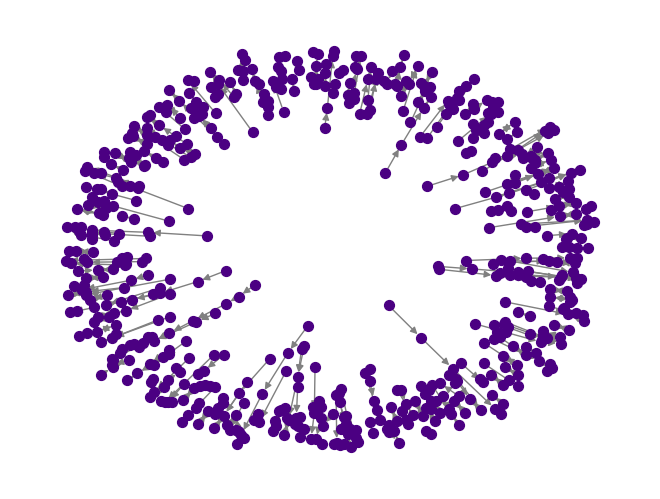

In [33]:
# este es el plot en 2D
nx.draw(G, node_color='indigo', edge_color='gray', node_size=50)

In [20]:
# lo pasamos a un arreglo de numpy
df_adj = nx.to_pandas_adjacency(G)
adj_matrix = df_adj.to_numpy()

In [21]:
# establezco las coordenadas:
x = mat_dict['Coord'][:, 0] 
y = mat_dict['Coord'][:, 1] 
z = mat_dict['Coord'][:, 2]  

In [30]:
# otras cosas para hacer que salga bonito el plot
pesoMaximo = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1
pesosNormalizados = adj_matrix / pesoMaximo
colormap = cm.jet

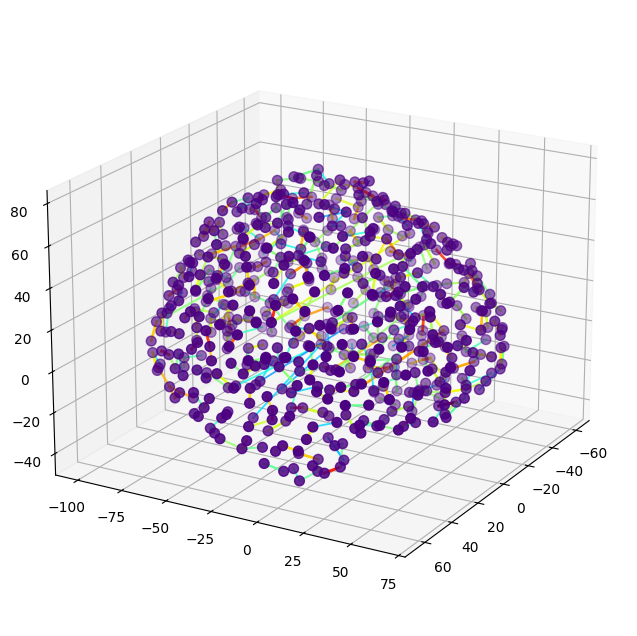

In [31]:
#Figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#nodos del plot de color verde
ax.scatter3D(x, y, z, color='indigo', s=50)

# aristas del plot
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0:
            color = colormap(pesosNormalizados[i, j])
            ax.plot(
                [x[i], x[j]],  
                [y[i], y[j]], 
                [z[i], z[j]],  
                color=color, alpha=0.8, lw=1 + 3 * weight)

#ángulo
ax.view_init(elev=20., azim=30)

# mostramos el plot
plt.show()